In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('intent_dataset.csv')

# 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['intent'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 모델 학습
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    750 non-null    object
 1   intent  750 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [27]:
df.sample(5)

,text,intent
652,맨 처음으로 가겠습니다,4
234,전출신고 하러 왔어요,1
587,직원 좀 도와줘요,3
696,첫 화면부터 다시,4
313,여권 만들려고요,2


In [3]:
# 모델 저장
import joblib

joblib.dump(clf, "intent_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [5]:
# text 의도 반환 함수
def predict_intent(text):
    vec = vectorizer.transform([text])
    pred = clf.predict(vec)[0]
    return pred

In [11]:
# 모델 테스트 
mapping = {
    0: "증명서 발급",
    1: "주소 변경",
    2: "여권 발급",
    3: "직원 호출",
    4: "시작화면"
}

def intent_to_text(intent):
    return mapping.get(intent)

test_sentences = [
    "등본 뽑아줬으면 좋겠어요",
    "주소 변경하러 왔어요",
    "여권 신청하고 싶어요",
    "직원 좀 불러줘",
    "처음으로 돌아가줘"
]

for sent in test_sentences:
    pred = predict_intent(sent)
    print(f"[{sent}] → 예측된 intent: {intent_to_text(pred)} [{pred}]")

[등본 뽑아줬으면 좋겠어요] → 예측된 intent: 증명서 발급 [0]
[주소 변경하러 왔어요] → 예측된 intent: 주소 변경 [1]
[여권 신청하고 싶어요] → 예측된 intent: 여권 발급 [2]
[직원 좀 불러줘] → 예측된 intent: 직원 호출 [3]
[처음으로 돌아가줘] → 예측된 intent: 시작화면 [4]


<Figure size 600x500 with 0 Axes>

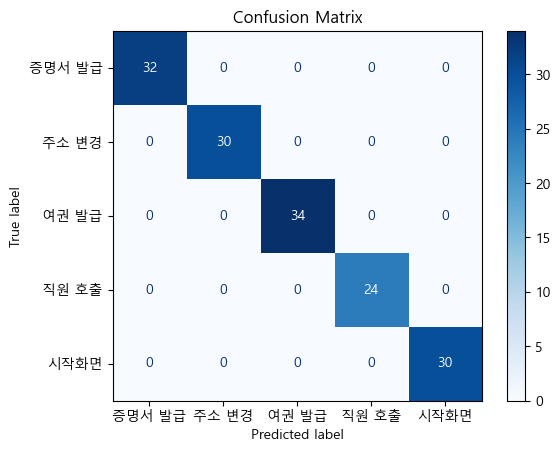

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.font_manager as fm

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 테스트셋 예측
y_pred = clf.predict(X_test_vec)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(mapping.values()))

# 시각화
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()